This notebook uses matrix-based entropy [1, 2, 3] to analyze the "mutual information plane" of pretrained LLMs. 

Authors: Oscar Skean

## The Matrix-based Entropy Quantity


Matrix-based entropy was first proposed in [1]. It is a quantity which serves as a tractable surrogate for traditional Shannon's entropy. It's calculated using a kernel $\kappa$ on a batch of samples drawn from a distribution, without making explicit assumptions on what the true distribution is. Before introducing matrix-based entropy, it would be helpful to introduce its traditional information theory analogue called Renyi entropy, given by:

\begin{equation}
\tag{Renyi Entropy}
H_{\alpha}({P}) = \frac{1}{1-\alpha}\log{\sum_{i-1}^n p_i^{\alpha}}
\end{equation}

The Renyi entropy is a family of entropies parameterized by $\alpha$. Notable special cases are $\alpha=0$ (max-entropy), $\displaystyle \lim_{\alpha \rightarrow 1}$ (Shannon entropy), and $\alpha=2$ (collision entropy). A good writeup of Renyi entropy and the usecases of different choices of $\alpha$ is given in [4].

The definition of matrix-based entropy is given as follows.
Given a infinitely divisible kernel $\kappa$, we first construct a Gram matrix $\mathbf{K}_{\mathbf{X}} \in \mathbb{R}^{\textrm{N} \times \textrm{N}}$ consisting of all pairwise evaluations of the $N$ points in $\mathbf{X}$. The choice of $\kappa$ can be fairly flexible and could be a Gaussian kernel, linear kernel, Laplacian kernel, etc. Given $\mathbf{K}_{\mathbf{X}}$, the matrix-based entropy of order $\alpha>0$ is defined as:
\begin{equation}
\tag{Matrix-based Entropy}
S_{\alpha}\left(\mathbf{K}_{\mathbf{X}}\right) = \frac{1}{1-\alpha}\log{\left[\textrm{tr}{\left( \left( \frac{\mathbf{K}_{\mathbf{X}}}{\textrm{tr}(\mathbf{K}_{\mathbf{X}})} \right)^{\alpha}\right) }\right]},
\end{equation}

 Raising a matrix to the power of an arbitary real-valued $\alpha$ is in general difficult, so using the fact that $tr(A) = \sum_{i=1}^n \lambda_i(A)$ we can equivalently compute the above as:

\begin{equation}
\tag{Matrix-based Entropy}
S_{\alpha}\left(\mathbf{K}_{\mathbf{X}}\right) = \frac{1}{1-\alpha}\log{\left[ \sum_{i=1}^N \frac{\lambda_i(\mathbf{K}_{\mathbf{X}})}{\textrm{tr}(\mathbf{K}_{\mathbf{X}})} \right]},
\end{equation}

Notice how the matrix $\mathbf{K}_{\mathbf{X}}$ is normalized before being raised to the $\alpha$ power. This is so that the eigenvalues of $\mathbf{K}_{\mathbf{X}}$ all sum to one (as per $tr(A) = \sum_{i=1}^n \lambda_i(A)$), which is a necessary condition to treat the eigenvalues as a probability distribution. The eigenvalues of $\mathbf{K}_{\mathbf{X}}$ signify the variance of datapoints in a particular principal component direction. Therefore Equation 3 is reminescent to the so called $logdet$ entropy which captures how much "volume" a dataset occupies. However, there are many hyperparameters involved in the logdet computation to improve stability and, in my experience, the above equation is much more stable.

Like Shannon's entropy, the matrix-based entropy acts as a building block for more complex quantites such as joint entropy and mutual information. The definitions for several important matrix-based quantities are given below. Note that $\kappa$ can be any infinitely divisible kernel or corresponding covariance matrix. The following definitions are rigously introduced in [1] and gently summarized in [2].

### Matrix-based joint entropy
In the following, the $\circ$ operation is the Hadamard product aka elementwise product.
\begin{equation}
\tag{Joint Entropy}
S_{\alpha}\left(\mathbf{K}_{\mathbf{X}}, \mathbf{K}_{\mathbf{Y}} \right) = S_{\alpha}(\mathbf{K}_\mathbf{X} \circ \mathbf{K}_\mathbf{Y})
\end{equation}

### Matrix-based conditional entropy

\begin{equation}
\tag{Conditional Entropy}
S_{\alpha}(\mathbf{K}_\mathbf{X} \vert \mathbf{K}_\mathbf{Y}) = S_{\alpha}(\mathbf{K}_\mathbf{X} \circ \mathbf{K}_\mathbf{Y}) - S_{\alpha}(\mathbf{K}_\mathbf{Y}). 
\end{equation}

### Matrix-based mutual information

\begin{equation}
\tag{Mutual Information}
I_{\alpha}(\mathbf{K}_\mathbf{X} ; \mathbf{K}_\mathbf{Y}) =  S_{\alpha}(\mathbf{K}_\mathbf{X}) - S_{\alpha}(\mathbf{K}_\mathbf{X} \vert \mathbf{K}_\mathbf{Y}) = S_{\alpha}(\mathbf{K}_\mathbf{X}) +  S_{\alpha}(\mathbf{K}_\mathbf{Y}) - S_{\alpha}(\mathbf{K}_\mathbf{X} \circ \mathbf{K}_\mathbf{Y}), 
\end{equation}

## Random Interesting Properties

1. If $\alpha=2$, you can avoid explicit eigendecomposition with the Frobenius norm $||A||_F^2 = \sum_{i} \sum_{j} A_{ij}^2 = \sum_i^n \lambda_i(A)^2$. The $O(n^3)$ eigendecomposition on the rhs is reduced to a $O(n^2)$ sum of matrix elements in the middle. This property was exploited in the field of self-supervised learning in [6].

2. It must be emphasized the matrix-based entropy is NOT necessarily an estimator of Shannon's entropy of the data. It is a different measure of entropy that satisfies the axioms of entropy proposed by Renyi. However, it has been shown that if $\kappa$ is a Gaussian kernel with bandwidth $\sigma$, then as batch size $N \rightarrow \infty$ and $\sigma \rightarrow 0$, then matrix-based entropy is equal to Shannon's entropy. Loosely speaking, this follows from Parzen density estimation principles where the kernel evaluation is equal to the probability of a sample under these limit conditions.

## References

1. Giraldo, Luis Gonzalo Sanchez, Murali Rao, and Jose C. Principe. "Measures of entropy from data using infinitely divisible kernels.
2. Skean, Oscar, et al. "Dime: Maximizing mutual information by a difference of matrix-based entropies. 
3. Bach, Francis. "Information theory with kernel methods."
4. https://en.wikipedia.org/wiki/R%C3%A9nyi_entropy
5. Wei, et al. "Large Language Model Evaluation via Matrix Entropy"
6. Skean, Oscar, et al. "FroSSL: Frobenius Norm Minimization for
Efficient Multiview Self-Supervised Learning"

# Entropy of Dataset

This section is a reproduction of Figure 1 in [5]. This paper uses $\alpha=1$, which is equivalent to the Shannon entropy of the normalized covariance eigenvalues. It references [2] and [3], though the special case of $\alpha=1$ was discussed even earlier in [1].

Some of the following dataloader/model code is adapted from https://github.com/waltonfuture/Matrix-Entropy

In [64]:
from transformers import AutoTokenizer, AutoModelForCausalLM, GPT2LMHeadModel, GPT2Model, AutoModel
import torch

device = "cuda:1"

cerebras_sizes = ['111M', '256M', '590M', '1.3B', '2.7B',] # '6.7B', '13B' also exist, but dont fit in 24G
#EleutherAI_sizes = ['14m', '70m', '160m', '410m', '1b', '1.4b', '2.8b',]  # '6.9b', '12b' also exist, but dont fit in 24G
EleutherAI_sizes = ['14m', '70m', '160m']
def get_model_path(name, size):
    assert name in ["cerebras", "EleutherAI"]

    if name == "cerebras":
        assert size in cerebras_sizes
        model_path = f"cerebras/Cerebras-GPT-{size}"
    else:
        assert size in EleutherAI_sizes
        model_path = f"EleutherAI/pythia-{size}"

    return model_path

In [2]:
from datasets import load_dataset, load_from_disk
from torch.utils.data import DataLoader

datasets = ['wikitext']

def get_dataloader(tokenizer, dataset_name, split='train'):
    assert dataset_name in datasets
    assert split in ['train', 'validation']

    if dataset_name == 'wikitext':
        dataset = load_dataset("wikitext", 'wikitext-103-v1')[split]
        num_samples = min(10000, len(dataset))
        dataset = dataset.select(range(num_samples))

    def tokenize_function(examples):
        return tokenizer(examples["text"], truncation=True, max_length=2048)

    tokenized_dataset = dataset.map(tokenize_function, batched=True).shuffle(seed=42)
    tokenized_dataset.set_format("torch")
    #example_texts = tokenized_dataset["text"] # use this to see the raw text, otherwise its removed

    tokenized_dataset = tokenized_dataset.remove_columns(["text"])
    tokenized_dataset = tokenized_dataset.filter(lambda x: len(x['input_ids']) > 5) # filter out the frequent blank/small examples in the dataset

    dataloader = DataLoader(tokenized_dataset, shuffle=False, drop_last=True) # something is weird with batch_size=x argument here, removing it for now
    return dataloader


In [14]:
import math

# from https://github.com/waltonfuture/Matrix-Entropy
def normalize(R):
    with torch.no_grad():
        mean = R.mean(dim=0)
        R = R - mean
        norms = torch.norm(R, p=2, dim=1, keepdim=True)
        R = R/norms
    return R

In [45]:
import tqdm
import torch.nn.functional as F
import repitl.matrix_itl as itl

def compute_sentences_for_each_sentence(model, dataloader, alpha=1):
    entropy_list = []
    
    with torch.no_grad():
        for batch in tqdm.tqdm(dataloader):
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            hidden_states = outputs.hidden_states
            N, D = hidden_states[0].shape[1:]

            last_hidden_state = normalize(outputs.last_hidden_state.squeeze())


            # be efficient here, XX^T and X^TX have the same eigenvalues and thus the same entropy
            if N > D:
                cov = last_hidden_state.T @ last_hidden_state
            else:
                cov = (last_hidden_state @ last_hidden_state.T)
            cov /= torch.trace(cov)

            entropy = itl.matrixAlphaEntropy(cov, alpha=alpha)
            entropy /= math.log(D) # the matrix LLM paper [5] does this in equation 5, not sure it is strictly necessary
            entropy_list.append(entropy.item())

    return entropy_list

Now we can compute the entropy of individual embedded sentences and get an estimate for the average entropy of a dataset

/home/AD/ofsk222/miniconda3/envs/information_plane/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
100%|██████████| 2430/2430 [00:22<00:00, 110.31it/s]


[]

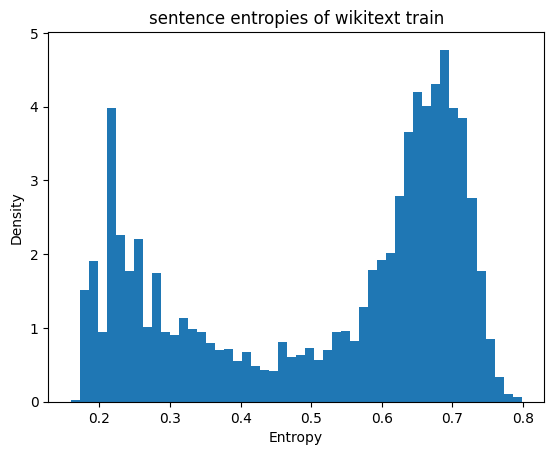

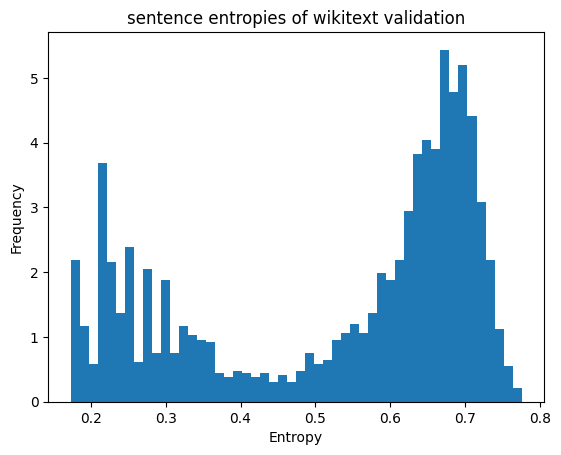

In [46]:
import matplotlib.pyplot as plt

# load model
model_path = get_model_path("EleutherAI", "70m")
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModel.from_pretrained(model_path, output_hidden_states=True).to(device)

# train set entropies
dataloader = get_dataloader(tokenizer, "wikitext", split="train")
train_entropies = compute_sentences_for_each_sentence(model, dataloader, alpha=1)

# validation set entropies
dataloader = get_dataloader(tokenizer, "wikitext", split="validation")
validation_entropies = compute_sentences_for_each_sentence(model, dataloader, alpha=1)

fig, ax = plt.subplots()
ax.hist(train_entropies, bins=50, density=True)
ax.set_title('sentence entropies of wikitext train')
ax.set_xlabel("Entropy")
ax.set_ylabel("Density")
plt.plot()

fig, ax = plt.subplots()
ax.hist(validation_entropies, bins=50, density=True)
ax.set_title('sentence entropies of wikitext validation')
ax.set_xlabel("Entropy")
ax.set_ylabel("Frequency")
plt.plot()

Lets take a look at how entropy changes as model size is increased

In [65]:
sample_entropies = {k: [] for k in EleutherAI_sizes}

for model_size in EleutherAI_sizes:
    print("Running ", model_size)
    model_path = get_model_path("EleutherAI", model_size)

    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModel.from_pretrained(model_path, output_hidden_states=True).to(device)

    dataloader = get_dataloader(tokenizer, "wikitext", split="train")
    sample_entropies[model_size] = compute_sentences_for_each_sentence(model, dataloader, alpha=1)

Running  14m


/home/AD/ofsk222/miniconda3/envs/information_plane/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
100%|██████████| 6413/6413 [00:50<00:00, 127.67it/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Running  70m


100%|██████████| 6413/6413 [00:56<00:00, 113.24it/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Running  160m


100%|██████████| 6413/6413 [01:32<00:00, 69.47it/s]


[14000000, 70000000, 160000000]


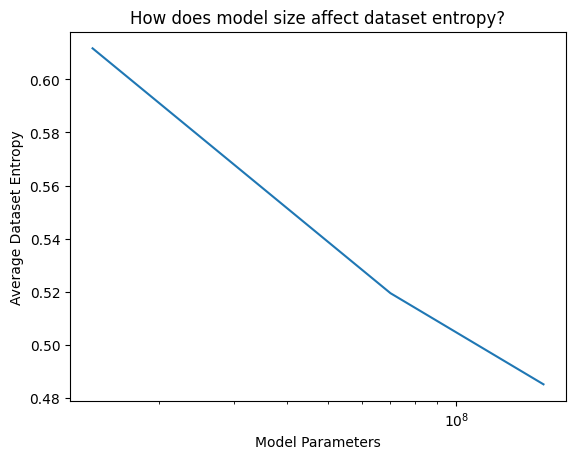

In [67]:
average_entropies = [sum(sample_entropies[k]) / len(sample_entropies[k]) for k in sample_entropies.keys()]
model_params = [int(x[:-1])*10**6 for x in EleutherAI_sizes]#if x[-1]=='m' else x[:-1]*10**7]
print(model_params)
plt.plot(model_params, average_entropies, label="Eleuther wikitext")
plt.xscale('log')
plt.xlabel("Model Parameters")
plt.ylabel("Average Dataset Entropy")
plt.title("How does model size affect dataset entropy?")
plt.show()

# Information Plane

The information plane is a probe on the model to analyze the mutual information between a pair of variables (input/output, input/layer representation, output/layer representation, etc.) as some quantity is changed (layer depth, context length, etc.).

In [90]:
def compute_information_plane(model, dataloader, var_A, var_B='layer', alpha=1):
    assert var_A in ['input', 'output']
    assert var_B in ['layer']

    mi_list = []
    counter = 0
    with torch.no_grad():
        for batch in tqdm.tqdm(dataloader):
            counter += 1
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            N, D = outputs.hidden_states[0].shape[1:]

            if var_A == 'input':
                A = outputs.hidden_states[0].squeeze() # not really input, but the first hidden state
            elif var_A == 'output':
                A = outputs.last_hidden_state.squeeze()

            if var_B == 'layer':
                B_list = outputs.hidden_states[1:]
            
            # get the covariance matrix for variable A
            if N > D:
                A_cov = A.T @ A
            else:
                A_cov = A @ A.T
            A_cov /= torch.trace(A_cov)

            # get the covariance matrix for variable B
            B_cov_list = []
            for B in B_list:
                B = B.squeeze()
                if N > D:
                    B_cov = B.T @ B
                else:
                    B_cov = B @ B.T
                B_cov /= torch.trace(B_cov)
                B_cov_list.append(B_cov)

            # compute the mutual information between A and each B
            mutual_informations = []
            for B_cov in B_cov_list:
                mi = itl.matrixAlphaMutualInformation(A_cov, B_cov, alpha=alpha)
                mi /= math.log(D)
                mutual_informations.append(mi.item())

            mi_list.append(mutual_informations)
            if counter > 1000:
                break

    return mi_list

In [91]:

model_path = get_model_path("EleutherAI", "70m")
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModel.from_pretrained(model_path, output_hidden_states=True).to(device)
dataloader = get_dataloader(tokenizer, "wikitext", split="train")

input_to_layer_info_plane = compute_information_plane(model, dataloader, "input", "layer", alpha=1)
output_to_layer_info_plane = compute_information_plane(model, dataloader, "output", "layer", alpha=1)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
 16%|█▌        | 1000/6413 [00:46<04:11, 21.56it/s]


Text(0.5, 1.0, 'Information Plane')

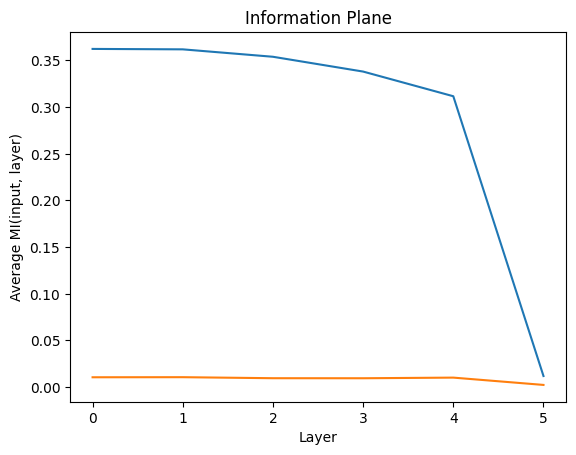

In [94]:
import numpy as np

input_layer_means = np.array(input_to_layer_info_plane).mean(axis=0)
output_layer_means = np.array(output_to_layer_info_plane).mean(axis=0)
plt.plot(input_layer_means, label="MI(input, layer)")
plt.plot(output_layer_means, label="MI(output, layer)")
plt.xlabel("Layer")
plt.ylabel("Average MI(input, layer)")
plt.title("Information Plane")